In [1]:
import os
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')

import numpy as np
from matplotlib import pyplot as plt

In [134]:
%%html

<style>
.p-Widget.p-Panel.jp-OutputArea-child {
    display: inline-block;
}
</style>

## Steven's Lambert Charge Model 1

Adapted from:

[A Lambert-Function Charge-Based Methodology for Extracting Electrical Parameters of Nanoscale FinFETs
](https://ieeexplore-ieee-org.proxy.lib.duke.edu/abstract/document/6343230)

With insight from:

[Compact Model of Drain Current in Short-Channel Triple-Gate FinFETs
](https://ieeexplore-ieee-org.proxy.lib.duke.edu/abstract/document/6202679)

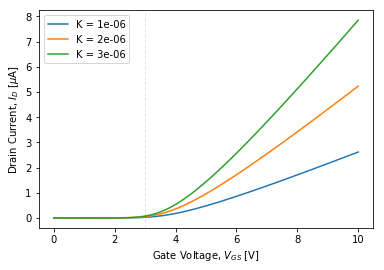

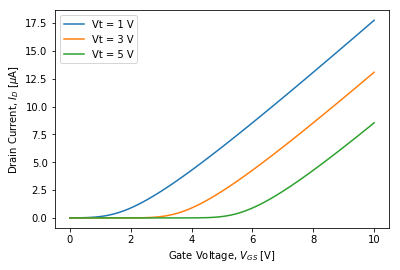

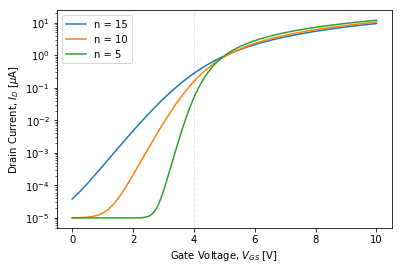

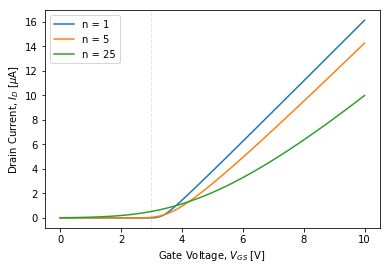

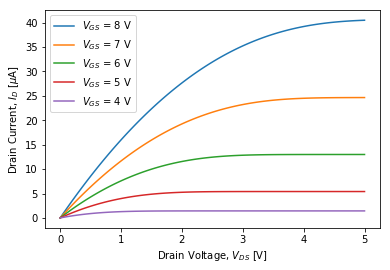

In [133]:
from scipy.special import lambertw

def stevenSimpleFET1(VGS = np.linspace(0,10,100),
                        VDS = 0.5,
                        Ioff = 1e-11,
                        Vt = 3,
                        SS = 0.5,
                        T = 273.15 + 21,
                        muCoxWoL = 5e-6,
                        n = None,
                        gm_max = None
                    ):
    kB = 8.617e-5
    q = 1
    Vtherm = kB*T/q
    
    if n is None:
        n = SS/(np.log(10)*Vtherm)
    if gm_max is not None:
        muCoxWoL = gm_max/VDS
    
    qis = lambertw(np.exp((VGS-Vt-0*VDS)/(2*n*Vtherm))).real
    qid = lambertw(np.exp((VGS-Vt-1*VDS)/(2*n*Vtherm))).real
    Id = muCoxWoL/2*(2*n*Vtherm)**2*(qis**2-qid**2)+Ioff
    
    return locals()

for muCoxWoL in [1e-6,2e-6,3e-6]:
    fet = stevenSimpleFET1(muCoxWoL=muCoxWoL)
    plt.plot(fet['VGS'], 1e6*fet['Id'], label='K = {}'.format(muCoxWoL))
plt.axvline(x=fet['Vt'], ls='--', c='k', lw=1, alpha=0.1)
plt.legend()
plt.ylabel('Drain Current, $I_D$ [$\mu$A]')
plt.xlabel('Gate Voltage, $V_{GS}$ [V]')
plt.show()

for Vt in [1,3,5]:
    fet = stevenSimpleFET1(Vt=Vt)
    plt.plot(fet['VGS'], 1e6*fet['Id'], label='Vt = {} V'.format(Vt))
plt.legend()
plt.ylabel('Drain Current, $I_D$ [$\mu$A]')
plt.xlabel('Gate Voltage, $V_{GS}$ [V]')
plt.show()

for n in reversed([5,10,15]):
    fet = stevenSimpleFET1(n=n, Vt=4)
    plt.semilogy(fet['VGS'], 1e6*fet['Id'], label='n = {}'.format(n))
plt.axvline(x=fet['Vt'], ls='--', c='k', lw=1, alpha=0.1)
plt.legend()
plt.ylabel('Drain Current, $I_D$ [$\mu$A]')
plt.xlabel('Gate Voltage, $V_{GS}$ [V]')
plt.show()

for n in [1,5,25]:
    fet = stevenSimpleFET1(n=n)
    plt.plot(fet['VGS'], 1e6*fet['Id'], label='n = {}'.format(n))
plt.axvline(x=fet['Vt'], ls='--', c='k', lw=1, alpha=0.1)
plt.legend()
plt.ylabel('Drain Current, $I_D$ [$\mu$A]')
plt.xlabel('Gate Voltage, $V_{GS}$ [V]')
plt.show()

for VGS in range(8,3,-1):
    VDS = np.linspace(0,5,100)
    fet = stevenSimpleFET1(VDS=VDS, VGS=VGS)
    plt.plot(fet['VDS'], 1e6*fet['Id'], label='$V_{{GS}}$ = {} V'.format(VGS))
plt.legend()
plt.ylabel('Drain Current, $I_D$ [$\mu$A]')
plt.xlabel('Drain Voltage, $V_{DS}$ [V]')
plt.show()


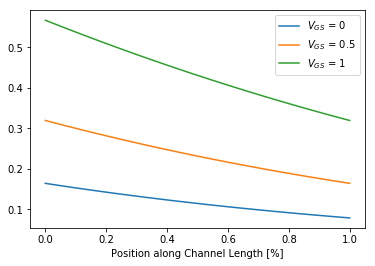

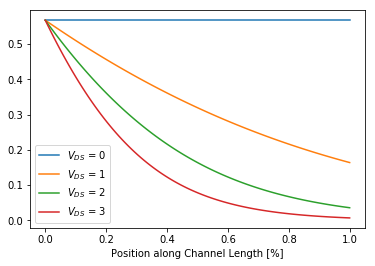

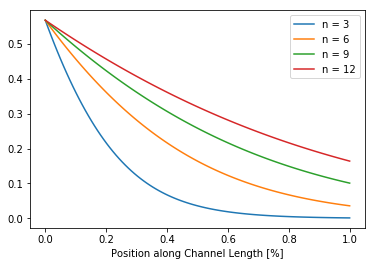

In [117]:
for VGS in [0,0.5,1]:
    VDS = 0.5
    xs = np.linspace(0,1,100)
    qis = lambertw(np.exp((VGS-Vt-xs*VDS)/(2*n*Vtherm))).real
    
    plt.plot(xs, qis, label='$V_{{GS}}$ = {}'.format(VGS))
plt.xlabel('Position along Channel Length [%]')
plt.legend()
plt.show()

for VDS in [0,1,2,3]:
    xs = np.linspace(0,1,100)
    qis = lambertw(np.exp((VGS-Vt-xs*VDS)/(2*n*Vtherm))).real
    
    plt.plot(xs, qis, label='$V_{{DS}}$ = {}'.format(VDS))
plt.xlabel('Position along Channel Length [%]')
plt.legend()
plt.show()

VDS = 1

for n in [3,6,9,12]:
    xs = np.linspace(0,1,100)
    qis = lambertw(np.exp((VGS-Vt-xs*VDS)/(2*n*Vtherm))).real
    
    plt.plot(xs, qis, label='n = {}'.format(n))
plt.xlabel('Position along Channel Length [%]')
plt.legend()
plt.show()
